# Introduction, Importing and Cleaning the Data


In [124]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline

In [125]:
xls = pd.ExcelFile('clean_work_based_project_data_for_portfolio.xlsx' )
df = xls.parse(0)
df.head(15)

,revised Associate id,Grade,Customer ID,Revised Customer Name,Parent Customer ID,Revised Parent customer id,Vertical,Vertical ServiceLines,Project Billability,Region,Revised On Off,Available Hrs,Billed Hrs,Location Avl Hrs,Utilization Percentage,Billed FTE,Total FTE,Unbilled FTE,Month,Location Available Hours 8hrs,Available Hours 8hrs,Billed Hours 8hrs,Utilization Percentage 8hrs,Assign State tag
0,A000001,AD,1208649,CU000001,2000522.0,PC2000000,Manlog,Data-Indst,BFD,UK,Offshore,32.0192,32.019200,160.0,1.000000,0.200120,0.20012,0.000000,2022-04-01,0.0,0.0,0.0,0.0,Billed
1,A000002,A,1208797,CU000002,2001744.0,PC2000001,Manlog,MSFT-Data,BTM,UK,Offshore,142.5096,120.000000,180.0,0.842049,0.666667,0.79172,0.125053,2022-04-01,0.0,0.0,0.0,0.0,Billed
2,A000003,M,1312366,CU000003,2000318.0,PC2000002,Life Sciences,AISQUAD,BFD,CE,Offshore,180.0000,105.930000,180.0,0.588500,0.588500,1.00000,0.411500,2022-04-01,0.0,0.0,0.0,0.0,Billed
3,A000004,SA,1221970,CU000004,2001050.0,PC2000003,BFS,CloudDataIntegration,BTM,UK,Offshore,180.0000,144.000000,180.0,0.800000,0.800000,1.00000,0.200000,2022-04-01,0.0,0.0,0.0,0.0,Billed
4,A000005,A,1223266,CU000005,2005813.0,PC2000004,BFS,MDM-DQG,BFD,CE,Offshore,90.0000,82.287000,180.0,0.914300,0.457150,0.50000,0.042850,2022-04-01,0.0,0.0,0.0,0.0,Billed
5,A000006,PAT,1208790,CU000006,2004593.0,PC2000005,BFS,Data-Indst,BTM,UK,Offshore,171.0000,56.000000,171.0,0.327485,0.327485,1.00000,0.672515,2022-04-01,0.0,0.0,0.0,0.0,Unbilled - Non MSA Buffer
6,A000007,P/PA,1208790,CU000006,2004593.0,PC2000005,BFS,Data-Indst,BTM,UK,Offshore,171.0000,128.000000,171.0,0.748538,0.748538,1.00000,0.251462,2022-04-01,0.0,0.0,0.0,0.0,Billed
7,A000008,PAT,1207644,CU000007,2001800.0,PC2000006,Life Sciences,AIML,BFD,CE,Offshore,83.1222,53.098461,180.0,0.638800,0.294991,0.46179,0.166799,2022-04-01,0.0,0.0,0.0,0.0,Unbilled - Non MSA Buffer
8,A000009,A,1207644,CU000007,2001800.0,PC2000006,Life Sciences,ModernBI-Indst,BFD,CE,Offshore,180.0000,172.170000,180.0,0.956500,0.956500,1.00000,0.043500,2022-04-01,0.0,0.0,0.0,0.0,Billed
9,A000010,P/PA,1219331,CU000008,2000559.0,PC2000007,Insurance,ModernDataEngineering,BTM,UK,Offshore,160.0000,0.000000,160.0,0.000000,0.000000,1.00000,1.000000,2022-04-01,0.0,0.0,0.0,0.0,Billed


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61598 entries, 0 to 61597
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   revised Associate id           61598 non-null  object        
 1   Grade                          61598 non-null  object        
 2   Customer ID                    61598 non-null  int64         
 3   Revised Customer Name          61598 non-null  object        
 4   Parent Customer ID             61150 non-null  float64       
 5   Revised Parent customer id     61150 non-null  object        
 6   Category                       61598 non-null  object        
 7   Service Lines                  61598 non-null  object        
 8   Project Billability            61598 non-null  object        
 9   Region                         61598 non-null  object        
 10  Revised On Off                 61598 non-null  object        
 11  Available Hrs  

In [72]:
df.drop(columns= ['Customer ID', 'Parent Customer ID', 'Location Available Hours 8hrs', 'Available Hours 8hrs', 'Billed Hours 8hrs', 'Utilization Percentage 8hrs', 'Assign State tag'], inplace=True)
df.rename(columns= {'revised Associate id': 'Associate Id', 
                    'Revised Customer Name': 'Customer ID', 
                    'Revised Parent customer id': 'Parent Customer Id',
                    'Project Billability': 'Billability',
                    'Revised On Off': 'Associate Location',
                    'Location Avl Hrs': 'Location Avail Hrs',
                    'Utilization Percentage': 'Utilisation Percent'}, inplace=True)


df.columns = [x.lower() for x in df.columns]
df.columns = df.columns.str.replace(' ', '_')

categories = ['grade', 'billability', 'region', 'category', 'service_lines', 'associate_location']
for item in categories:
    df[item] = df[item].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61598 entries, 0 to 61597
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   associate_id         61598 non-null  object        
 1   grade                61598 non-null  category      
 2   customer_id          61598 non-null  object        
 3   parent_customer_id   61150 non-null  object        
 4   category             61598 non-null  category      
 5   service_lines        61598 non-null  category      
 6   billability          61598 non-null  category      
 7   region               61598 non-null  category      
 8   associate_location   61598 non-null  category      
 9   available_hrs        61598 non-null  float64       
 10  billed_hrs           61598 non-null  float64       
 11  location_avail_hrs   61598 non-null  float64       
 12  utilisation_percent  61598 non-null  float64       
 13  billed_fte           61598 non-

In [73]:
mapping = {'Intern': 'Trainee',
        'PAT': 'Trainee',
        'P/PA': 'Associate',
        'A': 'Associate',
        'AD': 'Associate',
        'Cont': 'Senior',
        'SA': 'Senior',
        'SM': 'Senior',
        'SD': 'Senior',
        'M': 'Manager/Director',
        'D': 'Manager/Director'}

df['condensed_grade'] = df['grade'].replace(mapping)
df['billed_hrs_percent'] = ((df['billed_hrs'] / df['available_hrs'] ) * 100).round(2)
df['billed_fte_percent'] = ((df['billed_fte'] / df['total_fte'] ) * 100).round(2)

conditions = [
    (df['available_hrs'] == 0), # 'No Avail Hrs'
    (df['billed_hrs'] == 0), # 'No Billed Hrs'
    (1 < df['utilisation_percent']) & (df['utilisation_percent'] <= 1.25) & (df['available_hrs'] != 0), # 'Slightly Above'
    (1.25 < df['utilisation_percent']) & (df['available_hrs'] != 0), # 'Largely Above'
    (0.75 <= df['utilisation_percent']) & (df['utilisation_percent'] < 1) & (df['available_hrs'] != 0), # 'Slightly Below'
    (df['utilisation_percent'] < 0.75) & (df['available_hrs'] != 0), # 'Largely Below'
    (df['utilisation_percent'] == 1) & (df['available_hrs'] != 0) & (df['billed_hrs'] != 0) # 'Perfect'
    ]
choices = ['No Avail Hrs', 'No Billed Hrs', 'Slightly Above', 'Largely Above', 'Slightly Below', 'Largely Below', 'Perfect']

df['utilisation_type'] = np.select(conditions, choices, default='black')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df[df['utilisation_type']== np.inf]

,associate_id,grade,customer_id,parent_customer_id,category,service_lines,billability,region,associate_location,available_hrs,billed_hrs,location_avail_hrs,utilisation_percent,billed_fte,total_fte,unbilled_fte,month,condensed_grade,billed_hrs_percent,billed_fte_percent,utilisation_type


In [74]:
type(df['grade'].dtype)

pandas.core.dtypes.dtypes.CategoricalDtype

In [75]:
df[categories].describe()

,grade,billability,region,category,service_lines,associate_location
count,61598,61598,61598,61598,61598,61598
unique,11,4,2,8,68,3
top,A,BFD,USA,Sciences,ModernDataEngineering,Offshore
freq,14913,34526,38534,25108,6262,47362


In [76]:
df.isna().sum()

associate_id             0
grade                    0
customer_id              0
parent_customer_id     448
category                 0
service_lines            0
billability              0
region                   0
associate_location       0
available_hrs            0
billed_hrs               0
location_avail_hrs       0
utilisation_percent      0
billed_fte               0
total_fte                0
unbilled_fte             0
month                    0
condensed_grade          0
billed_hrs_percent     800
billed_fte_percent     800
utilisation_type         0
dtype: int64

In [77]:
df[df['parent_customer_id'].isnull()]['customer_id'].nunique()

19

In [78]:
df['customer_id'].nunique()

390

In [79]:
df[df.duplicated(subset= ['associate_id', 'customer_id', 'service_lines', 'month'], keep=False)] \
    .loc[(df['associate_id'] == 'A000002') & (df['month'] == '2022-01-01')] \
    .sort_values(by = ['associate_id', 'customer_id', 'service_lines']).head(10)

,associate_id,grade,customer_id,parent_customer_id,category,service_lines,billability,region,associate_location,available_hrs,billed_hrs,location_avail_hrs,utilisation_percent,billed_fte,total_fte,unbilled_fte,month,condensed_grade,billed_hrs_percent,billed_fte_percent,utilisation_type
20327,A000002,A,CU000002,PC2000001,Manufacturing,CDS-MSFTAzure,BTM,Europe,Offshore,94.7682,73.92,171.0,0.780008,0.4323,0.5542,0.1219,2022-01-01,Associate,78.0,78.0,Slightly Below
20328,A000002,A,CU000002,PC2000001,Manufacturing,CDS-MSFTAzure,BTM,Europe,Offshore,72.7177,0.00,171.0,0.000000,0.0000,0.4253,0.4253,2022-01-01,Associate,0.0,0.0,No Billed Hrs


In [80]:
df['month'].max()

Timestamp('2022-08-01 00:00:00')

In [81]:
#Cross Field validation


In [82]:
df.loc[df['billed_hrs'] < 0].head()

,associate_id,grade,customer_id,parent_customer_id,category,service_lines,billability,region,associate_location,available_hrs,billed_hrs,location_avail_hrs,utilisation_percent,billed_fte,total_fte,unbilled_fte,month,condensed_grade,billed_hrs_percent,billed_fte_percent,utilisation_type
79,A000079,SA,CU000042,PC2000034,Finance,ModernDataEngineering,BTM,Europe,Offshore,0.0000,-32.0,160.0,0.000000,-0.200000,0.00000,0.200000,2022-04-01,Senior,NaN,NaN,No Avail Hrs
198,A000196,Cont,CU000002,PC2000001,Manufacturing,AIML,BTM,Europe,Onsite,0.0000,-32.0,152.0,0.000000,-0.210526,0.00000,0.210526,2022-04-01,Senior,NaN,NaN,No Avail Hrs
306,A000302,SA,CU000059,PC2000049,Finance,BFS,BTM,USA,Offshore,0.0000,-8.0,152.0,0.000000,-0.052632,0.00000,0.052632,2022-04-01,Senior,NaN,NaN,No Avail Hrs
372,A000366,SA,CU000033,PC2000029,Retail,AIA,BTM,Europe,Offshore,2.2096,-20.0,160.0,-9.051410,-0.125000,0.01381,0.138810,2022-04-01,Senior,-905.14,-905.14,Largely Below
648,A000636,P/PA,CU000102,PC2000080,Communications,MSFT,BTM,USA,Offshore,180.0000,-8.0,180.0,-0.044444,-0.044444,1.00000,1.044444,2022-04-01,Associate,-4.44,-4.44,Largely Below


In [83]:
df.to_csv('clean_work_based_project_data.csv')

In [84]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61598 entries, 0 to 61597
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   associate_id         61598 non-null  object        
 1   grade                61598 non-null  category      
 2   customer_id          61598 non-null  object        
 3   parent_customer_id   61150 non-null  object        
 4   category             61598 non-null  category      
 5   service_lines        61598 non-null  category      
 6   billability          61598 non-null  category      
 7   region               61598 non-null  category      
 8   associate_location   61598 non-null  category      
 9   available_hrs        61598 non-null  float64       
 10  billed_hrs           61598 non-null  float64       
 11  location_avail_hrs   61598 non-null  float64       
 12  utilisation_percent  61598 non-null  float64       
 13  billed_fte           61598 non-

(61598, 21)

# Data Analysis

## What are the most active industries / categorys?

### Identify the most abundant and active client categorys / industries

In [85]:
df['category'].value_counts().sort_values(ascending=False)

Sciences          25108
Finance            9753
Retail             8448
Manufacturing      7660
Insurance          6089
Communications     3331
Technology         1189
Healthcare           20
Name: category, dtype: int64

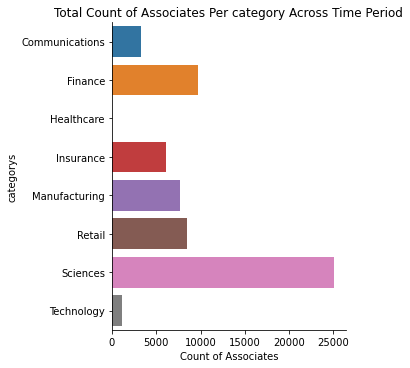

In [86]:

sns.catplot(y='category', data = df, kind = 'count', orient= 'horizontal')
#plt.barh(y = df['category'], width =  df['category'].count())

plt.xlabel('Count of Associates')
plt.ylabel('categorys')
plt.title('Total Count of Associates Per category Across Time Period')
#plt.savefig('Total Count of Non-Unique Associates Per category.png', dpi=300, bbox_inches='tight')
plt.show()

In [87]:
# Here, I'm establishing some code as variables in order to avoid repetition and to improve the efficiency of my code. 
# Im assigning a subset of entire dataframe to variable - one subset for the  most active categorys and one for the least.

top_categorys_list = ['Sciences', 'Finance', 'Manufacturing', 'Retail' ]
bottom_categorys_list = ['Healthcare', 'Technology', 'Communications Practice']

top_categorys_df = df[df['category'].isin(top_categorys_list)]
bottom_categorys_df = df[df['category'].isin(bottom_categorys_list)]

conditions = [
    (df['category'].isin(top_categorys_list)), # Top category
    (df['category'].isin(bottom_categorys_list)) # Bottom category
    ]
choices = ['Top category', 'Bottom category']

df['category_category'] = np.select(conditions, choices, default = None)

utilisation_type_order = ['Largely Below', 'Slightly Below', 'Perfect', 'Slightly Above', 'Largely Above']

Above we can see that Sciences have the highest number of associates assigned to them. Following them, in order: Finance, Retail and Manufacturing

### Identify which categorys / industries have the most customers and parent customers.

In [88]:
category_df= df.groupby('category')['associate_id'].nunique().sort_values(ascending=False).rename('associate_count').to_frame()
category_df['customer_count'] = df.groupby('category')['customer_id'].nunique()#.sort_values(ascending=False).rename().to_frame()
category_df['parent_customer_count'] = df.groupby('category')['parent_customer_id'].nunique()
category_df

,associate_count,customer_count,parent_customer_count
category,,,
Sciences,4103,76,28
Finance,1592,83,46
Retail,1313,49,36
Manufacturing,1262,65,49
Insurance,1025,59,33
Communications,559,38,35
Technology,209,18,12
Healthcare,6,2,2


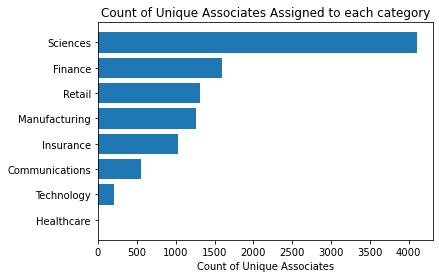

In [89]:
category_df.sort_values('associate_count', ascending = True, inplace=True)
plt.barh(y = category_df.index, width =  category_df['associate_count'])
plt.xlabel('Count of Unique Associates')
#plt.ylabel('categorys')
plt.title('Count of Unique Associates Assigned to each category')
plt.savefig('Count of Unique Associates per category.png', dpi=300, bbox_inches='tight')
plt.show()

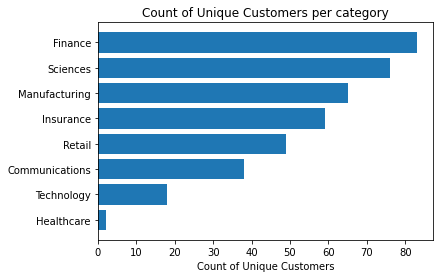

In [90]:
category_df.sort_values('customer_count', ascending = True, inplace=True)
plt.barh(y = category_df.index, width =  category_df['customer_count'])
plt.xlabel('Count of Unique Customers')
#plt.ylabel('categorys')
plt.title('Count of Unique Customers per category')
plt.savefig('Count of Unique Customers per category.png', dpi=300, bbox_inches='tight')
plt.show()

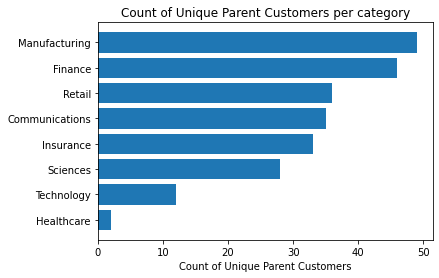

In [91]:
category_df.sort_values('parent_customer_count', ascending = True, inplace=True)
plt.barh(y = category_df.index, width =  category_df['parent_customer_count'])
plt.xlabel('Count of Unique Parent Customers')
#plt.ylabel('categorys')
plt.title('Count of Unique Parent Customers per category')
plt.savefig('Count of Unique Parent Customers per category.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/9w/qn189rp947s031qfhzvqt0g40000gn/T/ipykernel_41221/2892491155.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(category_df.index, rotation=90)
/var/folders/9w/qn189rp947s031qfhzvqt0g40000gn/T/ipykernel_41221/2892491155.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(category_df.index, rotation=90)


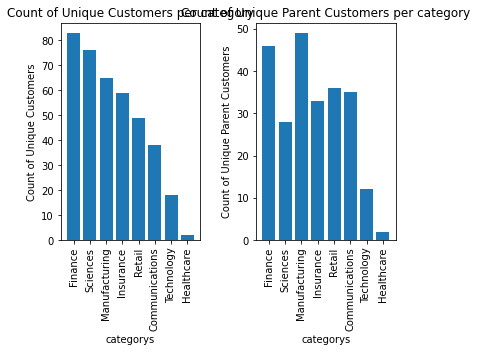

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2)
category_df.sort_values('customer_count', ascending = False, inplace=True)



ax1.bar(x = category_df.index, height =  category_df['customer_count'])
ax2.bar(x = category_df.index, height =  category_df['parent_customer_count'])

ax1.set_ylabel('Count of Unique Customers')
ax1.set_xlabel('categorys')
ax1.set_xticklabels(category_df.index, rotation=90)
ax1.set_title('Count of Unique Customers per category')

ax2.set_ylabel('Count of Unique Parent Customers')
ax2.set_xlabel('categorys')
ax2.set_xticklabels(category_df.index, rotation=90)
ax2.set_title('Count of Unique Parent Customers per category')

plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    wspace=0.4,
                    hspace=0.4)
#plt.figure = ()
plt.show()

This is something different. 

Communications Practice, Technology and Healthcare all have both the least amount of associates assigned to them, but also the least about of clients.

However, it isnt as linear or consistent with the top performing categorys.
Sciences has the most number associates with the second most number of projects
Finance has the second most number of associates with the most number of projects.

Between Retail, Insurance and Manufacturing, they switch around the order abit. With some having more associates and less projects. The ratio between associates to projects varies.



## What factors contribute to those industries the most?

The next question is to explore which factors contribute to the disparity of activeness of different client industries. I'm exploring all of the appropriate attributes provided in the dataset to see which can explain why particular industries are more active than others.

### Determine whether the number of associates per customer affects category performance

In [93]:
category_df['associate_per_customer'] = (category_df['associate_count'] / category_df['customer_count']).round(0)
category_df['customer_per_parent'] = (category_df['customer_count'] / category_df['parent_customer_count']).round(0)
category_df

,associate_count,customer_count,parent_customer_count,associate_per_customer,customer_per_parent
category,,,,,
Finance,1592,83,46,19.0,2.0
Sciences,4103,76,28,54.0,3.0
Manufacturing,1262,65,49,19.0,1.0
Insurance,1025,59,33,17.0,2.0
Retail,1313,49,36,27.0,1.0
Communications,559,38,35,15.0,1.0
Technology,209,18,12,12.0,2.0
Healthcare,6,2,2,3.0,1.0


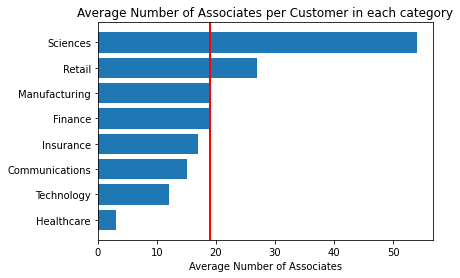

In [94]:
category_df.sort_values('associate_per_customer', ascending = True, inplace=True)

plt.barh(y = category_df.index, width=  category_df['associate_per_customer'])
plt.axvline(x=19, color='red', linewidth= 2)

plt.xlabel('Average Number of Associates')
#plt.ylabel('categorys')
#plt.xticks(rotation=90)
plt.title('Average Number of Associates per Customer in each category')

plt.savefig('Average NUmber of Associates Per Customer per category.png', dpi=300, bbox_inches='tight')
plt.show()

From this calculated dataframe we can see that the higher performing industries have have more associates per projects. Life sciences has the highest with an average of 54 per project. Healthcare, which is definitely the least active industry, only has an average of 3 associates per project. This indicates that the larger projects are a big factor towards the better performing industries. On average the projects within the top industries, have at least 19 associates assigned to them.

### Explore the relationship, if any, between region and the activity of industries

In [95]:
var_top = top_categorys_df.groupby(['category','customer_id'])['region'].value_counts().rename('count').to_frame()
var_top.reset_index(inplace= True)

var_bottom = bottom_categorys_df.groupby(['category','customer_id'])['region'].value_counts().rename('count').to_frame()
var_bottom.reset_index(inplace= True)

var_top.head()

,category,customer_id,level_2,count
0,Finance,CU000004,Europe,594
1,Finance,CU000004,USA,0
2,Finance,CU000005,USA,79
3,Finance,CU000005,Europe,0
4,Finance,CU000006,Europe,256


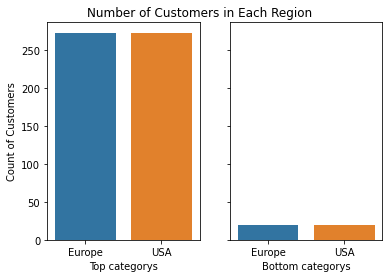

In [96]:
fig, axes = plt.subplots(1, 2, sharey=True )

sns.countplot(x = 'level_2', data =  var_top, ax = axes[0], order= ['Europe', 'USA'], hue_order= ['Europe', 'USA'] )
sns.countplot(x = 'level_2', data =  var_bottom, ax = axes[1], order= ['Europe', 'USA'], hue_order= ['Europe', 'USA'])
axes[0].set_xlabel('Top categorys')
axes[0].set_ylabel('Count of Customers')
axes[1].set_xlabel('Bottom categorys')
axes[1].set_ylabel(None)

plt.title('Number of Customers in Each Region', x = -0.2)
#plt.savefig('Number of Customers in Each Region between the Top and Bottom categorys.png', dpi =  300, bbox_inches='tight')
plt.show()

#top_categorys_df['region'].value_counts()

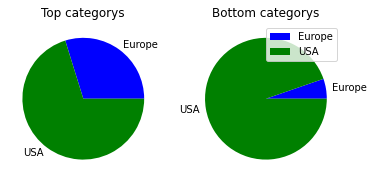

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(top_categorys_df['region'].value_counts().sort_values(), colors= ['b', 'g'], normalize=True, labels=  ['Europe', 'USA'])
ax2.pie(bottom_categorys_df['region'].value_counts().sort_values(), colors= ['b', 'g'], normalize=True, labels=  ['Europe', 'USA'])


plt.xticks(rotation=90)
ax1.set_title('Top categorys')
ax2.set_title('Bottom categorys')

plt.legend(['Europe', 'USA'])
plt.show()

we can see that.....

### Determine which category service lines are most active per category

In [98]:
df['service_lines'].nunique()

68

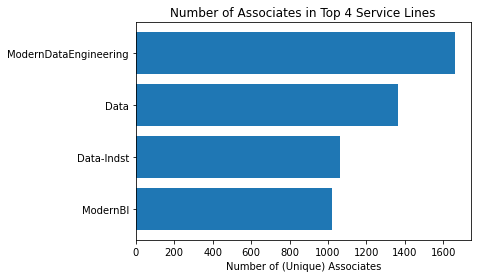

In [99]:
service_lines_df = df.groupby('service_lines')['associate_id'].nunique().nlargest(4).sort_values().to_frame()

plt.barh(y = service_lines_df.index, width = service_lines_df['associate_id'])

plt.title('Number of Associates in Top 4 Service Lines')
plt.xlabel('Number of (Unique) Associates')
plt.savefig('Number of Associates in Service Lines.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [100]:
service_lines_df = df['service_lines'].value_counts().nlargest(4).to_frame()
#service_lines_df['total_number_service_lines'] = df['service_lines'].nunique()
service_lines_df


,service_lines
ModernDataEngineering,6262
Data,6252
Data-Indst,5716
ModernBI,5448


The above category service lines are the most common across all categorys. These are the most active service lines throughout Cognizant, irrespective of the industry of the client. Next we'll explore the specific category service lines per highest performing vertials...

In [101]:
df.groupby('service_lines')['associate_id'].nunique().sort_values(ascending=False).to_frame()
df.groupby('service_lines')['associate_id'].nunique().sum()

18093

In [102]:
(df.groupby('service_lines')['associate_id'].nunique().nlargest(4).sum() / df.groupby('service_lines')['associate_id'].nunique().sum() ) * 100

28.24849389266567

There are a total of 68 unique category service lines. The top 5 account for roughly a third of all service lines requires by customers.

In [103]:
top_categorys_df.groupby('category')['service_lines'].apply(lambda grp: grp.value_counts().nlargest(4)).to_frame()

service_lines
category                                           
Communications AI                                 0
               GSA-Spoke                          0
               MSFT                               0
               MDM-DQG                            0
Finance        Data                            1763
               ModernDataEngineering           1420
               AISQUAD                          611
               CloudDataIntegration             578
Healthcare     AI                                 0
               GSA-Spoke                          0
               MSFT                               0
               MDM-DQG                            0
Insurance      AI                                 0
               GSA-Spoke                          0
               MSFT                               0
               MDM-DQG                            0
Manufacturing  ModernDataEngineering           1033
               MSFT-Data                        992
               Data                             540
               ModernData-Indst                 534
Retail         ModernBI                        1396
               MDM-DQG                         1066
               Data                             856
               MSFT-Data                        774
Sciences       Data-Indst                      3994
               ModernBI                        2340
               ModernDataEngineering           2058
               ModernData-Indst                1947
Technology     AI                                 0
               GSA-Spoke                          0
               MSFT                               0
               MDM-DQG                            0

In [104]:
bottom_categorys_df.groupby('category')['service_lines'].apply(lambda grp: grp.value_counts().nlargest(3)).to_frame()

service_lines
category                                               
Communications AI                                     0
               GSA-Spoke                              0
               MSFT                                   0
Finance        AI                                     0
               GSA-Spoke                              0
               MSFT                                   0
Healthcare     DeliveryProgramManagement              9
               AIML                                   3
               Healthcare                             3
Insurance      AI                                     0
               GSA-Spoke                              0
               MSFT                                   0
Manufacturing  AI                                     0
               GSA-Spoke                              0
               MSFT                                   0
Retail         AI                                     0
               GSA-Spoke                              0
               MSFT                                   0
Sciences       AI                                     0
               GSA-Spoke                              0
               MSFT                                   0
Technology     MSFT-Data                            147
               ModernBI                             146
               ModernDataEngineering                144

We can see that for:
- Sciences, Data-Industry and Modern Business Intelligence are the most active category service lines
- Finance, Data and Mordern Engineering are the most active category service lines
- Manufacturing, Modern Data Engineering and Microsoft Data are the most active category service lines
- Retail. Modern BI and MDM - DQG are the most active category service lines

So we can deduce that projects that require data and, data engineering and modern BI associates are the best projects. 

### Explore whether the proportions of associate grades per customer affects category performance

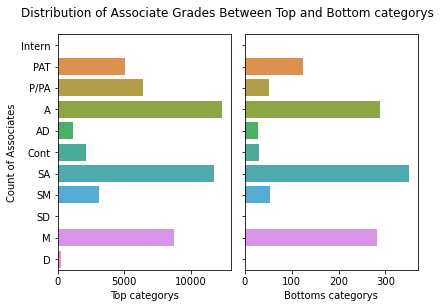

In [105]:
grade_list = ['Intern','PAT', 'P/PA', 'A', 'AD', 'Cont', 'SA', 'SM', 'SD', 'M', 'D']


fig, axes = plt.subplots(1, 2, sharey=True)

sns.countplot(y = 'grade', data =  top_categorys_df, ax = axes[0], order=grade_list)
sns.countplot(y = 'grade', data =  bottom_categorys_df, ax = axes[1], order=grade_list)
axes[0].set_xlabel('Top categorys')
axes[0].set_ylabel('Count of Associates')
axes[1].set_xlabel('Bottoms categorys')
axes[1].set_ylabel(None)

plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    wspace=0.8,
                    hspace=0.4)

plt.tight_layout()
plt.title('Distribution of Associate Grades Between Top and Bottom categorys', x = -0.1, y = 1.05)
plt.savefig('Number of Associate Per Grades Between Top and Bottom categorys.png', dpi = 300, bbox_inches = 'tight')
plt.show()


We can see.....

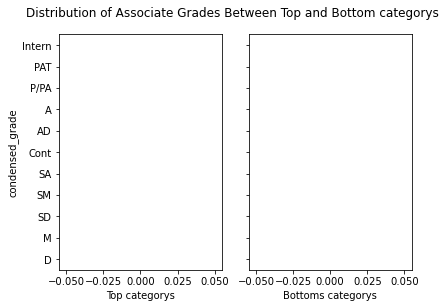

In [106]:
condensed_grade_order = ['Trainee','Associate', 'Senior', 'Manager/Director'] 
 
fig, axes = plt.subplots(1, 2, sharey=True)

sns.countplot(y = 'condensed_grade', data =  df[df['category'].isin(top_categorys_list)], ax = axes[0], order=grade_list)
sns.countplot(y = 'condensed_grade', data =  df[df['category'].isin(bottom_categorys_list)], ax = axes[1], order=grade_list)
axes[0].set_xlabel('Top categorys')
#axes[0].set_ylabel('Count of Associates')
axes[1].set_xlabel('Bottoms categorys')
axes[1].set_ylabel(None)

plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    wspace=0.8,
                    hspace=0.4)

plt.tight_layout()
plt.title('Distribution of Associate Grades Between Top and Bottom categorys', x = -0.1, y = 1.05)
plt.savefig('Number of Associate Per Condensed Grades Between Top and Bottom categorys.png', dpi = 300, bbox_inches = 'tight')
plt.show()

We can see that...

### Explore the relationship, if any, between billability types and category performance.

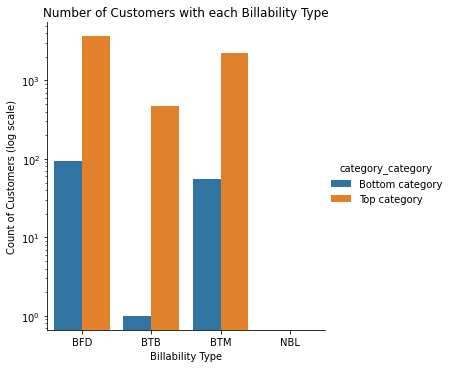

In [107]:
joke = df.groupby(['category_category', 'category', 'billability'])['customer_id'].count().to_frame()
joke.reset_index(inplace = True)
joke = joke[joke['billability'].isin(['BFD', 'BTM', 'BTB'])]
joke

g = sns.catplot(x= 'billability', y = 'customer_id', 
        data = joke, kind='bar', ci = None, hue= 'category_category') #, col = 'category', order = billability_list)
plt.yscale('log')

plt.xlabel('Billability Type')
plt.ylabel('Count of Customers (log scale)')
plt.title('Number of Customers with each Billability Type')
plt.savefig('Number of Customers with each Billability Type.png', dpi=300, bbox_inches='tight')
#plt.show()

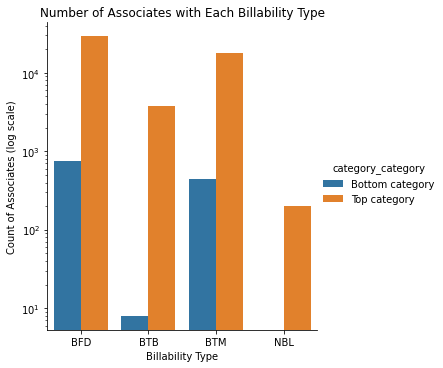

In [108]:
top_bottom_df = df[df['category_category'].isin(['Bottom category', 'Top category'])]

g = sns.catplot(x= 'billability', data = top_bottom_df, kind='count', hue= 'category_category', 
        hue_order= ['Bottom category', 'Top category']) #, col = 'category', order = billability_list)

plt.yscale('log')
plt.xlabel('Billability Type')
plt.ylabel('Count of Associates (log scale)')
plt.title('Number of Associates with Each Billability Type')
plt.savefig('Number of Associates with Each Billability Type.png', dpi=300, bbox_inches='tight')
plt.show()

We can see there's no significant difference that would indicate the billability type contributes to the performance or success of a category.

### Explore the utilisation percent per grade per category

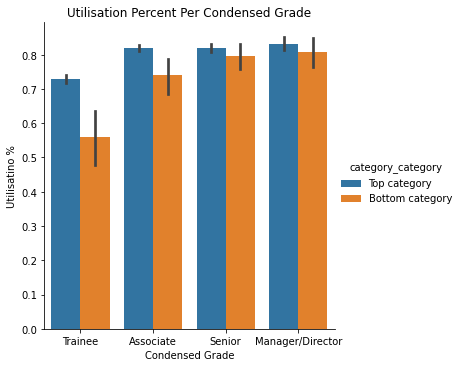

In [109]:
top_bottom_df = df[df['category_category'].isin(['Top category', 'Bottom category'])]

g = sns.catplot(x= 'condensed_grade', y= 'utilisation_percent', data = top_bottom_df, kind='bar', 
                hue= 'category_category', order = condensed_grade_order)

#plt.yscale('log')
#plt.margins(x=0.0001)
plt.title('Utilisation Percent Per Condensed Grade')
plt.xlabel('Condensed Grade')
plt.ylabel('Utilisatino %')
plt.savefig('Utilisation Percent Per Condensed Grade.png', dpi =300, bbox_inches='tight')
plt.show()

Again, negligible difference

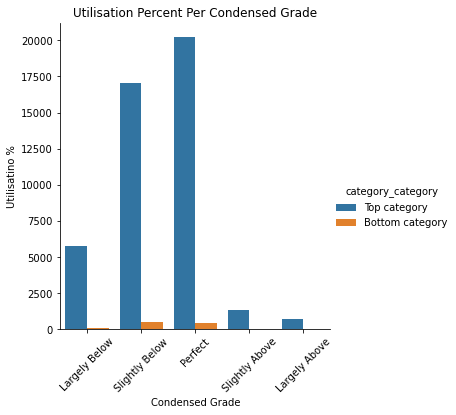

In [110]:
g = sns.catplot(x= 'utilisation_type', #y='utilisation_percent',
                data = top_bottom_df[top_bottom_df['utilisation_type'].isin(utilisation_type_order)], 
                kind='count', hue= 'category_category', order= utilisation_type_order
                )

#plt.yscale('log')
plt.xticks(rotation = 45)
plt.title('Utilisation Percent Per Condensed Grade')
plt.xlabel('Condensed Grade')
plt.ylabel('Utilisatino %')
#plt.savefig('Utilisation Percent Per Condensed Grade.png', dpi =300, bbox_inches='tight')
plt.show()

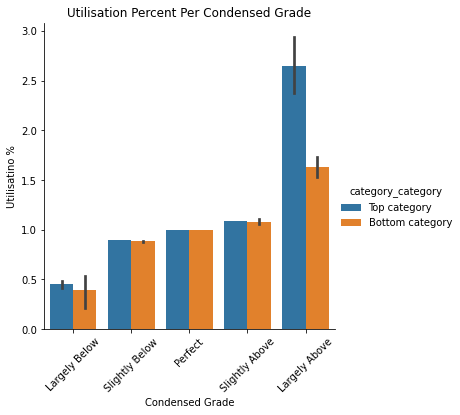

In [111]:
g = sns.catplot(x= 'utilisation_type', y='utilisation_percent',
                data = top_bottom_df[top_bottom_df['utilisation_type'].isin(utilisation_type_order)], 
                kind='bar', hue= 'category_category', order= utilisation_type_order
                )

#plt.yscale('log')
plt.xticks(rotation = 45)
plt.title('Utilisation Percent Per Condensed Grade')
plt.xlabel('Condensed Grade')
plt.ylabel('Utilisatino %')
#plt.savefig('Utilisation Percent Per Condensed Grade.png', dpi =300, bbox_inches='tight')
plt.show()

Generally, trainees have the lowest utilisation percentage, but this is marginal
While there is no significant difference in the utilisation percentage of the grades between the top and bottom categorys, overall, the 

### Mean Available vs Billed Hrs per Condensed grade per category

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


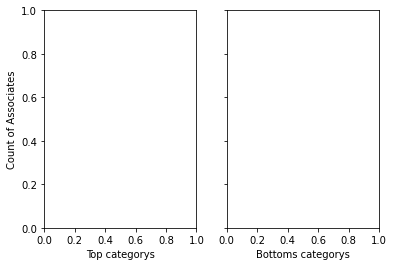

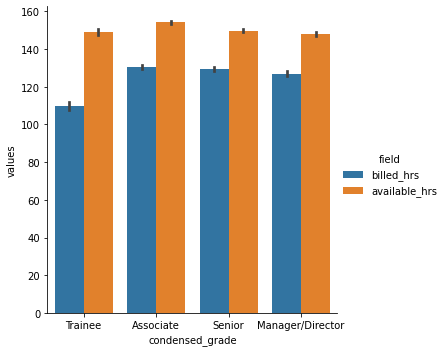

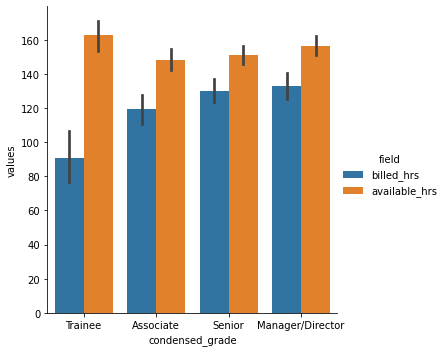

In [112]:
id_vars = ('associate_id', 'month', 'condensed_grade', 'category_category')
value_vars = ('billed_hrs', 'available_hrs')

top_bottom_df_melt = df[df['category_category'].isin(['Top category', 'Bottom category'])] \
        .melt(id_vars=id_vars, value_vars= value_vars, var_name='field', value_name= 'values')

#top_bottom_df_melt[top_bottom_df_melt['category_category'] == 'Top category']

# top_f = top_bottom_df_melt[(top_bottom_df_melt['field'] == 'category_category') & \
#         (top_bottom_df_melt['values'] == 'Top category')]

# top_f

# bottom_f = top_bottom_df_melt.loc(top_bottom_df_melt['field'] == 'category_category') & \
#         (top_bottom_df_melt['values'] == 'Bottom category')

# top_bottom_df_melt
fig, axes = plt.subplots(1, 2, sharey=True)

sns.catplot(x= 'condensed_grade', y= 'values', 
                data = top_bottom_df_melt[top_bottom_df_melt['category_category'] == 'Top category'], 
                kind='bar', ax = axes[0],
                hue= 'field', order = condensed_grade_order)

sns.catplot(x= 'condensed_grade', y= 'values', 
                data = top_bottom_df_melt[top_bottom_df_melt['category_category'] == 'Bottom category'], 
                kind='bar', ax = axes[1],
                hue= 'field', order = condensed_grade_order)


axes[0].set_xlabel('Top categorys')
axes[0].set_ylabel('Count of Associates')
axes[1].set_xlabel('Bottoms categorys')
axes[1].set_ylabel(None)

plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    wspace=0.8,
                    hspace=0.4)

#plt.yscale('log')
plt.show()

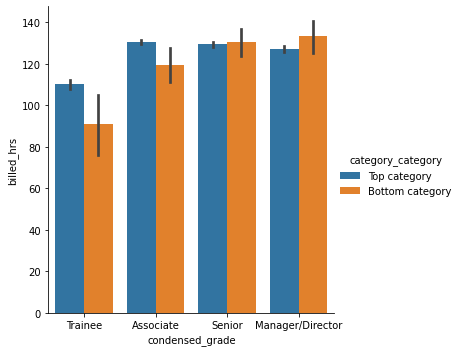

In [113]:
top_bottom_df = df[df['category_category'].isin(['Top category', 'Bottom category'])]

g = sns.catplot(x= 'condensed_grade', y= 'billed_hrs', data = top_bottom_df, kind='bar', 
                hue= 'category_category', order = condensed_grade_order)

#plt.yscale('log')
plt.show()

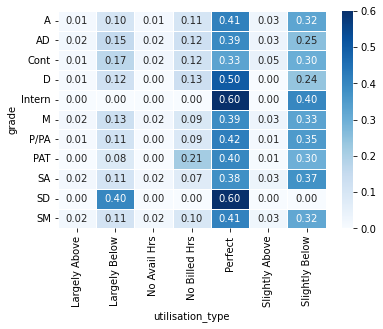

In [114]:
df_crosstab_2 = pd.crosstab(top_categorys_df['grade'], top_categorys_df['utilisation_type'], 
                    values = top_categorys_df['associate_id'], aggfunc= 'count', 
                    normalize='index').round(8).fillna(0) 

g = sns.heatmap(df_crosstab_2, annot=True, cmap= 'Blues', linewidths = .5, fmt = '.2f', )

plt.yticks(rotation=0) 
plt.show()

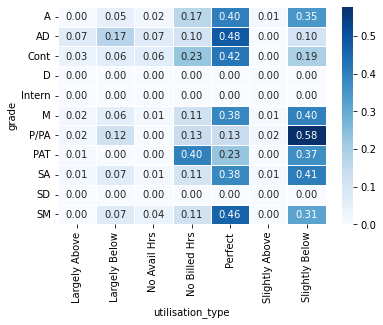

In [115]:
df_crosstab_2 = pd.crosstab(bottom_categorys_df['grade'], bottom_categorys_df['utilisation_type'], 
                    values = bottom_categorys_df['associate_id'], aggfunc= 'count', 
                    normalize='index').round(8).fillna(0) 

g = sns.heatmap(df_crosstab_2, annot=True, cmap= 'Blues', linewidths = .5, fmt = '.2f', )

plt.yticks(rotation=0) 
plt.show()

In [116]:
df['associate_location'].value_counts()

Offshore     47362
Onsite       13760
Nearshore      476
Name: associate_location, dtype: int64

In [117]:
df_crosstab = pd.crosstab(df['associate_location'], df['grade'], values = df['associate_id'], aggfunc= 'count', normalize = 'index').round(3).fillna(0) 
df_crosstab

grade,A,AD,Cont,D,Intern,M,P/PA,PAT,SA,SD,SM
associate_location,,,,,,,,,,,
Nearshore,0.176,0.011,0.233,0.000,0.0,0.109,0.086,0.015,0.351,0.000,0.019
Offshore,0.277,0.014,0.024,0.003,0.0,0.150,0.147,0.124,0.220,0.000,0.041
Onsite,0.126,0.057,0.096,0.009,0.0,0.253,0.028,0.008,0.308,0.001,0.116


i need to add the proportions to this

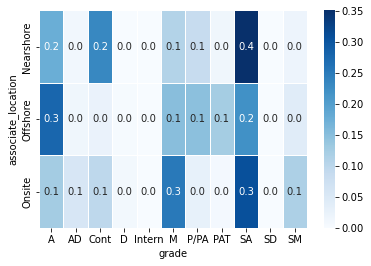

In [118]:
g = sns.heatmap(df_crosstab, annot=True, cmap= 'Blues', linewidths = .5, fmt = '.1f')
plt.show()

### What is the relationship, if any. between the average number of associates per customer and the total_fte hours

(0.0, 200.0)

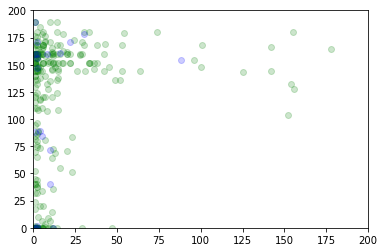

In [119]:

plt.scatter(
    x = df[df['category'].isin(top_categorys_list)].groupby('customer_id')['associate_id'].nunique(),
    y = df[df['category'].isin(top_categorys_list)].groupby('customer_id')['billed_hrs'].median(), 
    c= 'g', alpha = 0.2)

plt.scatter(
    x = df[df['category'].isin(bottom_categorys_list)].groupby('customer_id')['associate_id'].nunique(),
    y = df[df['category'].isin(bottom_categorys_list)].groupby('customer_id')['billed_hrs'].median(), 
    c= 'b', alpha = 0.2)

plt.xlim(0, 200)
plt.ylim(0, 200)


In [120]:
b_billability_df = bottom_categorys_df.groupby('region')['utilisation_percent'].mean().rename('avg_utilisation').to_frame()
#billability_df['avg_utilisation'] = df.groupby('category')['utilisation_percent'].mean()
b_billability_df['avg_billed_hrs'] = bottom_categorys_df.groupby('region')['billed_hrs'].mean()
b_billability_df['avg_loc_avail_hrs'] = bottom_categorys_df.groupby('region')['location_avail_hrs'].mean()
b_billability_df.reset_index(inplace=True)
b_billability_df.set_index('region', inplace=True)
b_billability_df

,avg_utilisation,avg_billed_hrs,avg_loc_avail_hrs
region,,,
Europe,0.780147,127.131268,181.69869
USA,0.349906,60.483827,176.15625


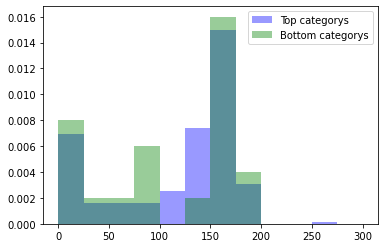

In [121]:
#fig, (ax1, ax2) = plt.subplots()

column = 'billed_hrs'
range = (0, 300)
bins =  12

plt.hist(top_categorys_df.groupby('customer_id')[column].median(), bins = bins, range= range, density= True, color='b', alpha= 0.4, label= 'Top categorys')
plt.hist(bottom_categorys_df.groupby('customer_id')[column].median(), bins = bins, range= range, density= True, color='g', alpha= 0.4, label = 'Bottom categorys')

#axes1 = sns.displot(top_categorys_df, x ='billed_hrs', bins = 10, ax= axes[0], kind = 'hist')
#axes2 = sns.displot(bottom_categorys_df, x ='billed_hrs', bins = 10, ax= axes[1], kind = 'hist')
plt.legend()
plt.show()

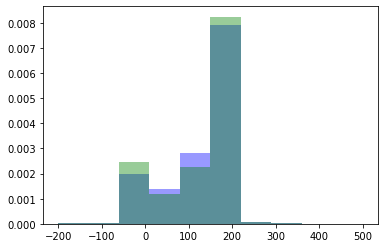

In [122]:
#fig, (ax1, ax2) = plt.subplots()

plt.hist(top_categorys_df['billed_hrs'], bins = 10, range= (-200, 500), density= True, color='b', alpha= 0.4)
plt.hist(bottom_categorys_df['billed_hrs'], bins = 10, range= (-200, 500), density= True, color='g', alpha= 0.4)

#axes1 = sns.displot(top_categorys_df, x ='billed_hrs', bins = 10, ax= axes[0], kind = 'hist')
#axes2 = sns.displot(bottom_categorys_df, x ='billed_hrs', bins = 10, ax= axes[1], kind = 'hist')
plt.show()

The above histograms show the distribution of billed hrs across all associates. The top histogram is for those associates assigned to the top categorys and vice versa for the bottom histogram. The two distributions are pretty much identical; there is minute difference, if any. From this, we can assess that the number of billed hours is a not a contributing factor to the performance of a project in a particular industry industry.